# Milan Bansal
# Roll no: 214102318

# $$ \color{red} { \text{ASSIGNMENT : 3} }$$

In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Q1.)
####  Find the Fourier series associated with the function

\begin{equation}
  f(x)=\begin{cases}
    0, −π ≤ x < 0\\
    π − x, 0 ≤ x ≤ π 
  \end{cases}
\end{equation}


#### Write a function to determine the coefficients a0, an, and bn. Plot the magnitude of the coefficients with |an| in blue colour and |bn| in red colour.

In [2]:
dx = 0.001 
pi = np.pi # valueo of pi


def fourier_series_coeff(x, f , L, k ): # Function to calculate fourier series coeff and the series for order k
    A0 = np.sum(f * dx) / (2 * L) # the avg value
    An = np.zeros(k) # initial array for An values
    Bn = np.zeros(k) # initial array for Bn values
    
    f_sum = A0 # initiating sum as 0 
    
    for n in range(k): # performing integration and getting values for An and Bn
        An[n] = (np.sum(f * np.cos((n+1) * pi * x / L) ) * dx) / L
        Bn[n] = (np.sum(f * np.sin((n+1) * pi * x / L) ) * dx) / L
        
        f_sum = f_sum +  An[n] * np.cos( pi * (n+1) * x / L) + Bn[n] * np.sin( pi * (n+1) * x / L) # getting series of order 'k'
       
    return A0, An, Bn, f_sum 


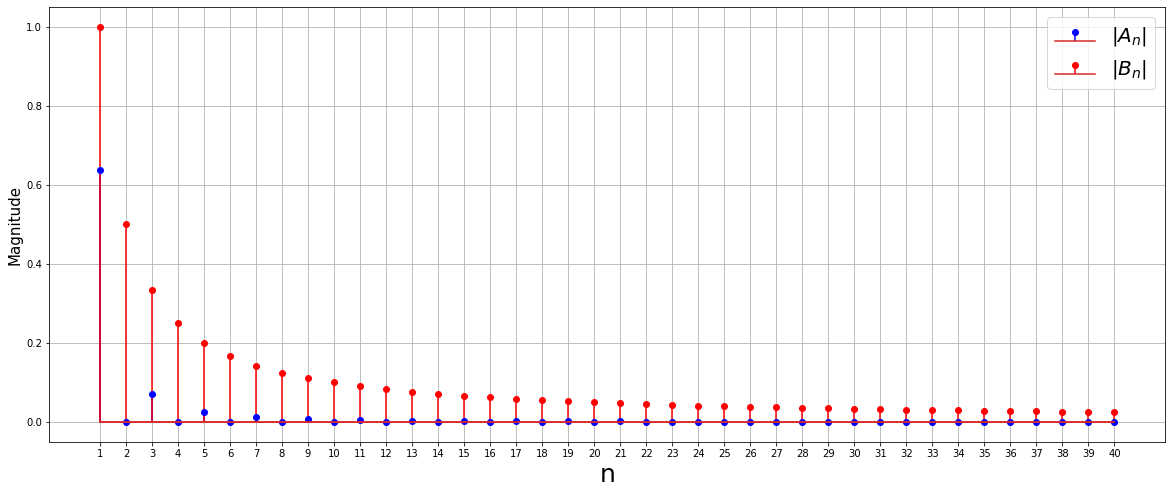

In [3]:
q1_x = np.arange(-pi, pi, dx) # time axis

# creating given signal
q1_f = np.zeros_like(q1_x) 

for i in range(len(q1_x)):
    x = q1_x[i]
    if x>= -pi and x<0:
        q1_f[i] = 0
    elif x>=0 and x<pi:
        q1_f[i] = pi - x
        
#############################################################        
no_of_exp = 40 # number of expressions

q1_A0, q1_An, q1_Bn, q1_FS =  fourier_series_coeff(q1_x, q1_f, pi, no_of_exp) # getting the FS coeff for the given function

q1_n = np.arange(1,no_of_exp+1) # n axis


# plotting 

figq1 = plt.figure(figsize = (20, 8)) 
axq1 = figq1.add_subplot(111)
axq1.stem(q1_n, np.absolute(q1_An), 'b', markerfmt = 'bo', label = r'$|A_n|$' )
axq1.stem(q1_n, np.absolute(q1_Bn), 'r', markerfmt = 'ro', label = r'$|B_n|$' )
plt.xticks(q1_n)
plt.xlabel('n', size = 25)
plt.ylabel('Magnitude', size = 15)
plt.grid()
plt.legend(prop={'size': 20})
plt.show()

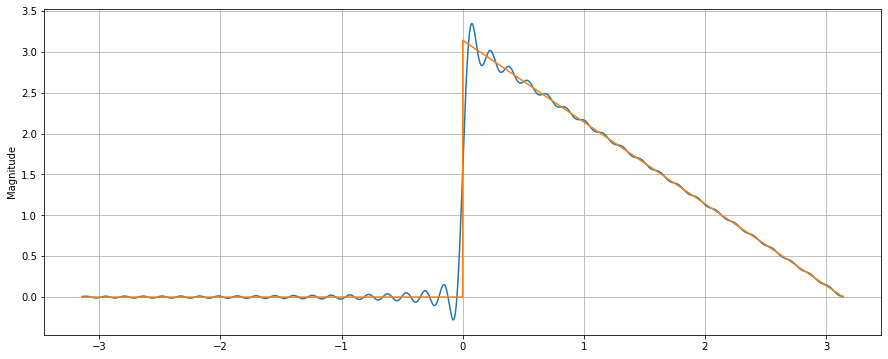

In [4]:
# plot for fourier series sum and original signal
plt.figure(figsize = (15,6))
plt.plot(q1_x, q1_FS)
plt.plot(q1_x, q1_f)
plt.grid()
plt.ylabel('Magnitude', size = 10)
plt.show()

# Q2.)
#### The saw-tooth wave f is shown in Figure :
#### (a) For the saw-tooth wave f, compute the Fourier series on the interval [-1,1]. Plot the magnitude of the coefficients.
#### (b) For the Fourier series expression in (a), plot the partial sum of order 3 with red colour and the original saw-tooth wave f with blue colour. Compare the results on the same plot.
#### (c) Plot the partial sum of order 9 for the saw-tooth function with green colour and the original saw-tooth wave f with blue colour. The plots obtained for (b) and (c) must be shown in different subplots and you should be able to explain your observation.



# a.)

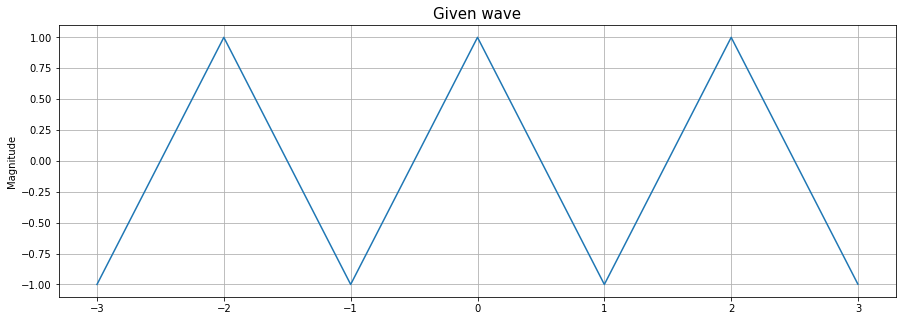

In [5]:
def even_tri_wave(n): # function to generate even triangular wave
    wave = []
    cycle = np.arange(-1,1,dx)
    
    for x in cycle:
        if x>=-1 and x<0:
            wave.append(2 * x + 1)
        elif x>=0 and x<1:
            wave.append(-2 * x + 1)
    return  np.arange(-n,n,dx), np.array(n * wave)

###################################################################
# plotting the given wave
x2, y2 = even_tri_wave(3) # getting the given triangular wave

figq2a = plt.figure(figsize = (15,5))
plt.plot(x2,y2)
plt.title('Given wave',size = 15)
plt.ylabel('Magnitude', size = 10)
plt.grid()
###################################################################

q2_x, wave = even_tri_wave(1)  # segment of the wave between [-1, 1]

q2_A0, q2_An, q2_Bn, q2_FS =  fourier_series_coeff(q2_x, wave, 1, 20) # getting Fourier Series ond its coeff for the above segment


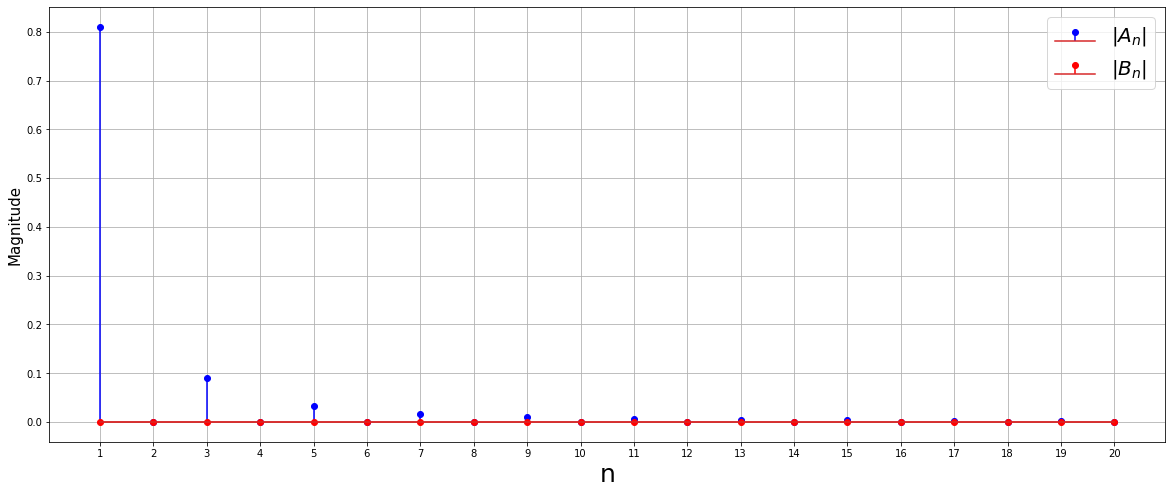

In [6]:
# plotting 

q2_n = np.arange(1,21)  # n axis for An and Bn
figq2 = plt.figure(figsize = (20, 8))
axq2 = figq2.add_subplot(111)
axq2.stem(q2_n, np.absolute(q2_An), 'b', markerfmt = 'bo', label = r'$|A_n|$' )
axq2.stem(q2_n, np.absolute(q2_Bn), 'r', markerfmt = 'ro', label = r'$|B_n|$' )
plt.xticks(q2_n )
plt.xlabel('n', size = 25)
plt.ylabel('Magnitude', size = 15)
plt.grid()
plt.legend(prop={'size': 20})
plt.show()

# b.)

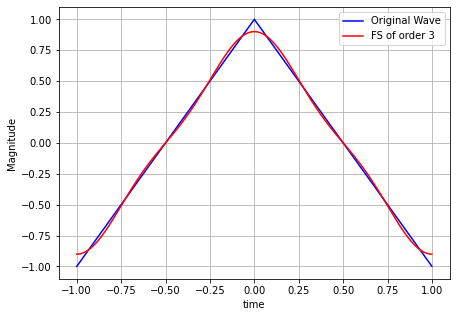

In [7]:
# getting 3rd order partial sum:
FS_3rd = q2_A0

for n in range(3):
    FS_3rd = FS_3rd +  q2_An[n] * np.cos( pi * (n+1) * q2_x / 1) + q2_Bn[n] * np.sin( pi * (n+1) * q2_x / 1)
    
# plotting the fourier series and original wave segment
fig2b = plt.figure(figsize = (7,5)) 
axq2b = fig2b.add_subplot(111)
axq2b.plot(q2_x, wave,'b', label = 'Original Wave')
axq2b.plot(q2_x, FS_3rd,'r', label = 'FS of order 3') 
plt.legend()
plt.ylabel('Magnitude', size = 10)
plt.xlabel('time', size = 10)
plt.grid()
plt.show()

# c.)

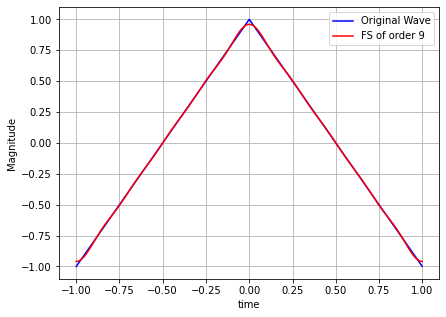

In [8]:
# getting 9th order partial sum:
FS_9th = q2_A0

for n in range(9):
    FS_9th = FS_9th +  q2_An[n] * np.cos( pi * (n+1) * q2_x / 1) + q2_Bn[n] * np.sin( pi * (n+1) * q2_x / 1)

# plotting the fourier series and original wave segment
fig2c = plt.figure(figsize = (15,5)) 
axq2c = fig2c.add_subplot(121)
axq2c.plot(q2_x, wave,'b', label = 'Original Wave')
axq2c.plot(q2_x, FS_9th,'r', label = 'FS of order 9') 
plt.ylabel('Magnitude', size = 10)
plt.xlabel('time', size = 10)
plt.legend()
plt.grid()
plt.show()

# Q3.)
### $$ X(\omega) =  \int_{- \infty}^{\infty} x(t)e^{-j\omega t} \,dt  $$
### Write your custom function which takes input from the below given signals and computes the magnitude and phase spectra $(a > 0)$. Sketch $x(t)$, $|X(\omega)|$, and $∠X(\omega)$ when $A = 2$ and $a = 4$.

### (a)
\begin{equation}
  x(t)=\begin{cases}
    Ae^{-at}, t\ge 0\\
    0, t<0
  \end{cases}
\end{equation}
### (b)
$$x(t) = Ae^{-a|t|}$$

In [9]:

def fourier_transform(f,x): # function to perform fourier transform
    xw = np.arange(-15,15,0.01) # w axis 
    FT_real = np.zeros_like(xw) # initial real part array
    FT_imag = np.zeros_like(xw) # initial imag part array
    
    for i in range(len(xw)): # intgrating the signal to get real and imag part of the fourier transform
        FT_real[i] = np.sum(f * np.cos(- xw[i] * x)) * dx # real part
        FT_imag[i] = np.sum(f * np.sin(- xw[i] * x)) * dx # imag part
        
        
        # returns w axis, modulus, and phase
    return xw, np.sqrt(FT_real**2 + FT_imag**2), np.arctan(FT_imag/FT_real) 
    

# a.)

In [10]:
q3_A = 2
q3_a = 4

# generating given signal
q3_x = np.arange(-5,5,dx) # time axis

q3_f1 = np.zeros_like(q3_x)

for i in range(len(q3_x)):
    if q3_x[i] >= 0:
        q3_f1[i] = q3_A * np.exp(- q3_a * q3_x[i] )

xw1, mod1, phs1 = fourier_transform(q3_f1, q3_x) # getting the fourier transform for the given signal

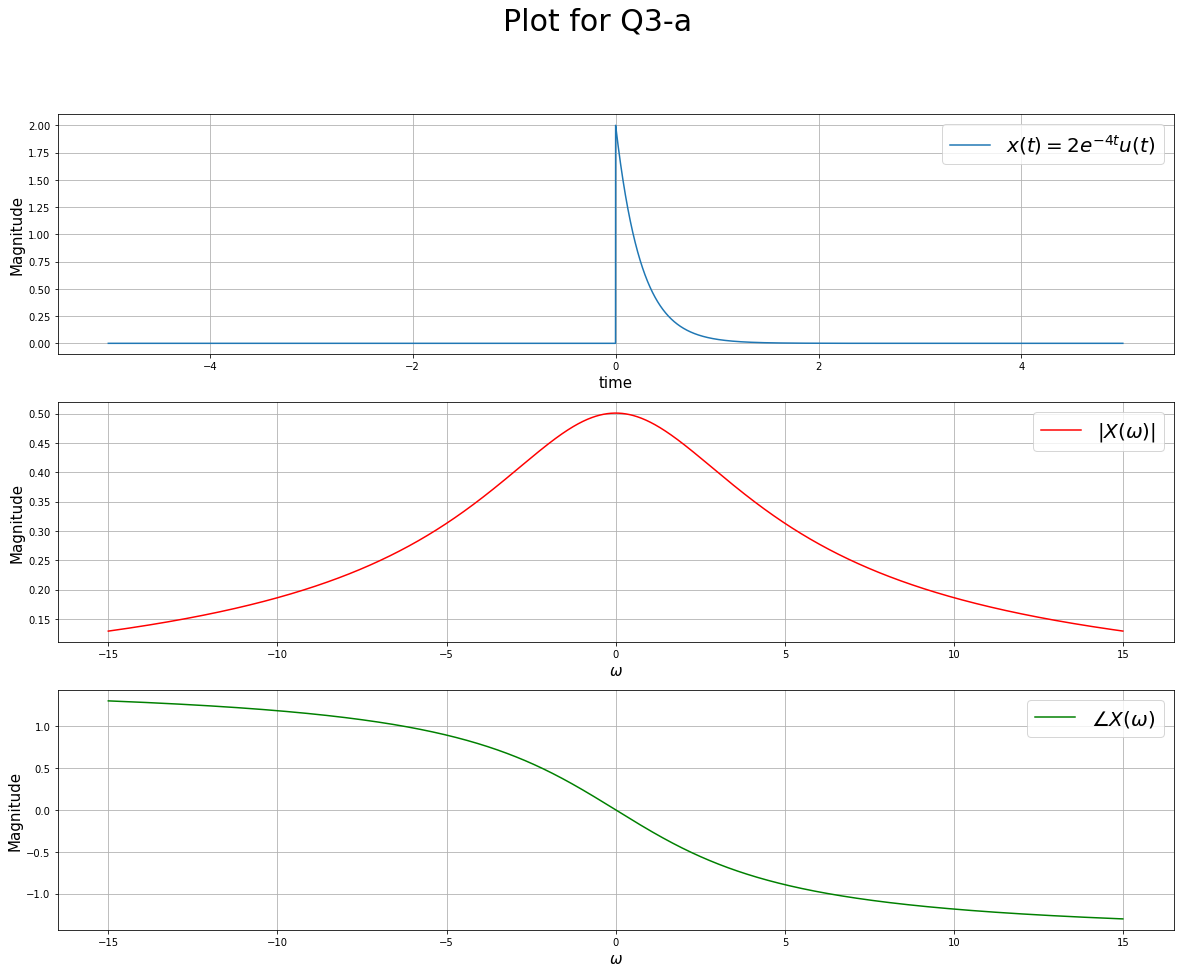

In [11]:
# plotting 

figq3a = plt.figure(figsize = (20,15))
figq3a.suptitle('Plot for Q3-a', size = 30)


axq3a1 = figq3a.add_subplot(311)
axq3a1.plot(q3_x, q3_f1, label = r'$x(t) = 2e^{-4t}u(t)$') # given signal
axq3a1.grid()
axq3a1.legend(prop={'size': 20})
plt.ylabel('Magnitude', size = 15)
plt.xlabel('time', size = 15)

axq3a2 = figq3a.add_subplot(312)
axq3a2.plot(xw1, mod1,'r',  label = r'$|X(\omega)|$') # fourier transform
axq3a2.grid()
axq3a2.legend(prop={'size': 20})
plt.ylabel('Magnitude', size = 15)
plt.xlabel(r'$\omega$', size = 15)

axq3a3 = figq3a.add_subplot(313)
axq3a3.plot(xw1, phs1,'g' ,label = r'$\angle X(\omega)$') # phase 
axq3a3.grid()
axq3a3.legend(prop={'size': 20})
plt.ylabel('Magnitude', size = 15)
plt.xlabel(r'$\omega$', size = 15)

plt.show()

# b.)

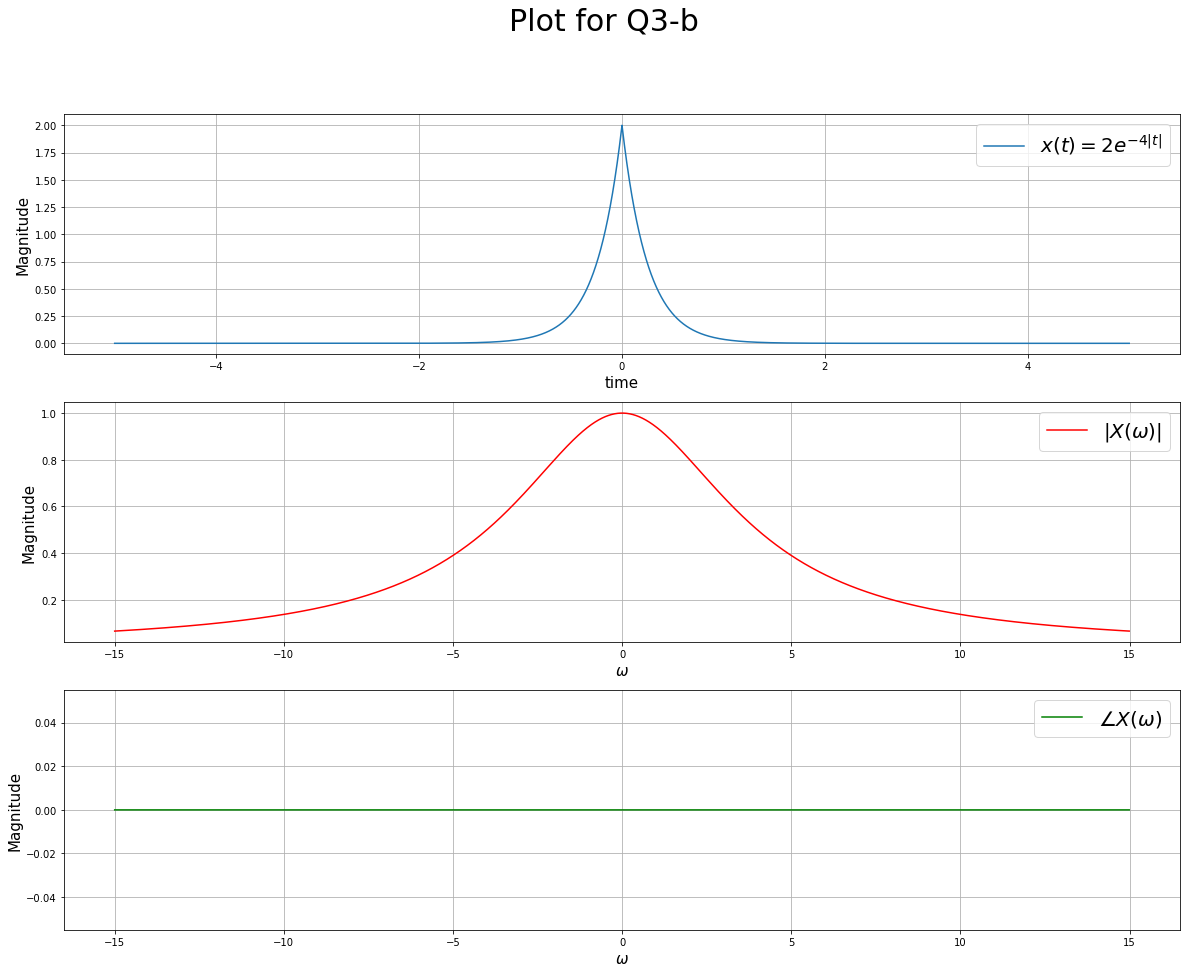

In [12]:
q3_f2 = q3_A * np.exp(- q3_a * np.absolute(q3_x)) # generating the given signal

xw2, mod2, phs2 = fourier_transform(q3_f2, q3_x) # geting fourier transform

# plotting
figq3b = plt.figure(figsize = (20,15))
figq3b.suptitle('Plot for Q3-b', size = 30)


axq3b1 = figq3b.add_subplot(311)
axq3b1.plot(q3_x, q3_f2, label = r'$x(t) = 2e^{-4|t|}$') # given signal
axq3b1.grid()
axq3b1.legend(prop={'size': 20})
plt.ylabel('Magnitude', size = 15)
plt.xlabel(r'time', size = 15)

axq3b2 = figq3b.add_subplot(312)
axq3b2.plot(xw2, mod2,'r',  label = r'$|X(\omega)|$') # fourier transform
axq3b2.grid()
axq3b2.legend(prop={'size': 20})
plt.ylabel('Magnitude', size = 15)
plt.xlabel(r'$\omega$', size = 15)

axq3b3 = figq3b.add_subplot(313)
axq3b3.plot(xw2, np.round(phs2, 3),'g' ,label = r'$\angle X(\omega)$') # phase
axq3b3.grid()
axq3b3.legend(prop={'size': 20})
plt.ylabel('Magnitude', size = 15)
plt.xlabel(r'$\omega$', size = 15)

plt.show()

# Q4.)
### Determine and sketch $X_R(\omega)$, $X_I (\omega)$, $|X(\omega)|$, and $\angle X(\omega)$ for the Fourier transform:
$$X(\omega) = \frac{1}{1 - ae^{-j\omega}} \space \space -1 \le a \le 1$$
### Show the graphical representation of the spectra for a = 0.8

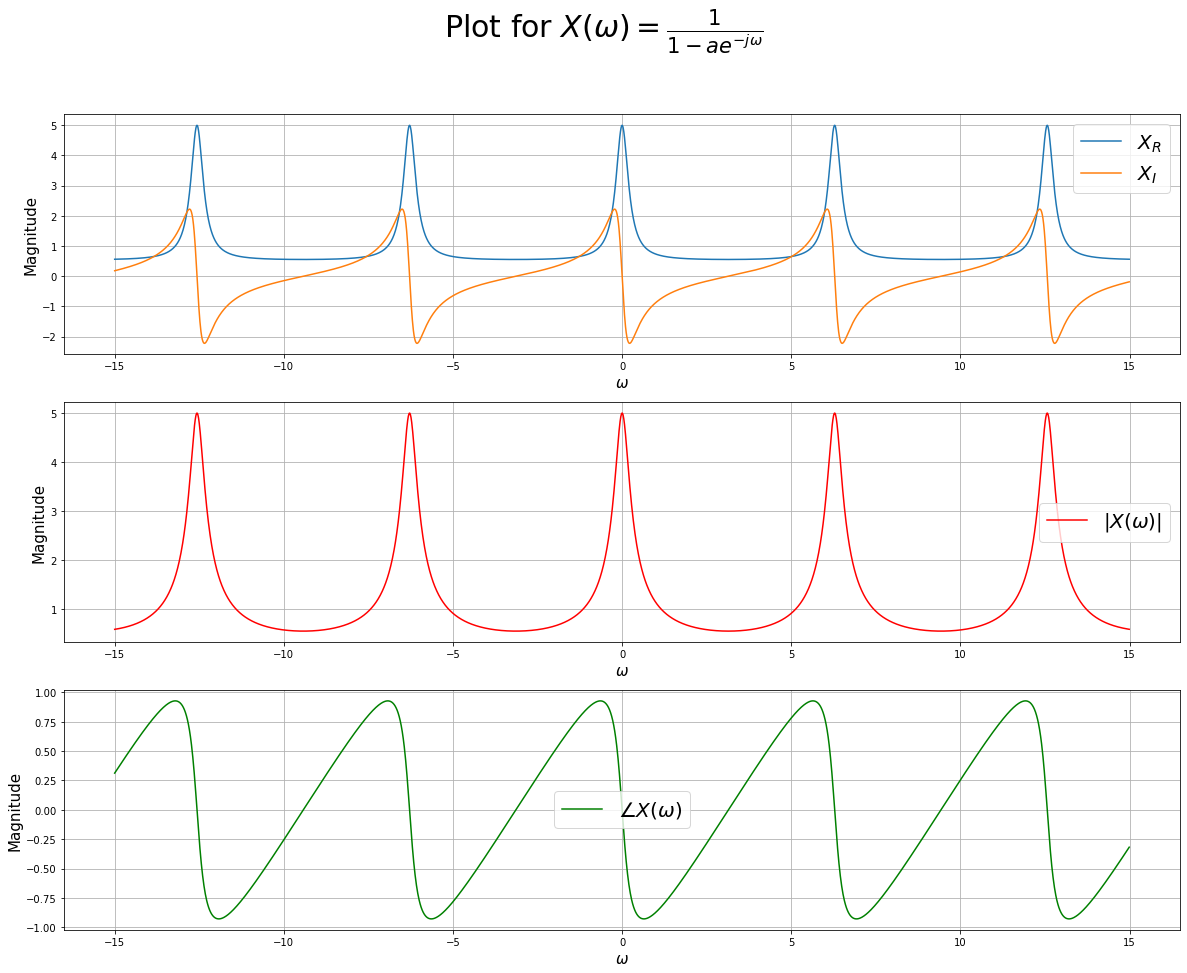

In [13]:
xw = np.arange(-15,15,0.01)

a = 0.8

# generating real and imaginary part of the given signal
q4_real = (1/((1 - a*np.cos(xw))**2 + (a*np.sin(xw))**2 )) * (1-a*np.cos(xw)) 
q4_imag = (1/((1 - a*np.cos(xw))**2 + (a*np.sin(xw))**2 )) * (-a*np.sin(xw))
    
q4_mod = np.sqrt(q4_real**2 + q4_imag**2) # calculating modulus
q4_phase = np.arctan(q4_imag / q4_real)   # calculating  phase
    
# plotting
figq4 = plt.figure(figsize = (20,15))
figq4.suptitle(r'Plot for $X(\omega) = \frac{1}{1 - ae^{-j\omega}}$', size = 30)


axq41 = figq4.add_subplot(311)
axq41.plot(xw, q4_real, label = r'$X_R$') # real part
axq41.plot(xw, q4_imag, label = r'$X_I$') # imag part
axq41.grid()
axq41.legend(prop={'size': 20})
plt.ylabel('Magnitude', size = 15)
plt.xlabel(r'$\omega$', size = 15)

axq42 = figq4.add_subplot(312)
axq42.plot(xw, q4_mod,'r',  label = r'$|X(\omega)|$') # modulus
axq42.grid()
axq42.legend(prop={'size': 20})
plt.ylabel('Magnitude', size = 15)
plt.xlabel(r'$\omega$', size = 15)

axq43 = figq4.add_subplot(313)
axq43.plot(xw2, q4_phase,'g' ,label = r'$\angle X(\omega)$') # phase
axq43.grid()
axq43.legend(prop={'size': 20})
plt.ylabel('Magnitude', size = 15)
plt.xlabel(r'$\omega$', size = 15)

plt.show()    

# Q5.)
### Determine the Fourier transform of the signal:
## $$x(n) = a^{|n|}$$
### Plot $x(n)$ and $X(\omega)$ with a = 0.6.

In [14]:
def dft(f): # function to calculate DFT
    N = len(f) # length of DFT
    n = np.arange(N) # n axis for given signal
    k = np.arange(N) # axis for DFT

    FT_real = np.zeros(N) # initial array for real part
    FT_imag = np.zeros(N) # initial array for imag part
    
    for i in range(len(k)): # performing summation to get real and imag part of DFT
        FT_real[i] = np.sum(f * np.cos(- k[i] * n * 2 * pi / N)) 
        FT_imag[i] = np.sum(f * np.sin(- k[i] * n * 2 * pi / N)) 
        
        # returns k axis, real part, imag part, and modulus
    return k, FT_real, FT_imag, np.sqrt(FT_real**2 + FT_imag**2 ) 

def dtft(f,x): # function to calculate DTFT
    xw = np.arange(-10,10,0.001) # w axis for DTFT
    FT_real = np.zeros_like(xw) # initial array for real part
    FT_imag = np.zeros_like(xw) # initial array for imag part
    
    for i in range(len(xw)): # performing summation to get real and imag part of DTFT
        FT_real[i] = np.sum(f * np.cos(- xw[i] * x)) 
        FT_imag[i] = np.sum(f * np.sin(- xw[i] * x)) 
        
        # returns w axis, real part, imag part, and modulus
    return xw, FT_real, FT_imag, np.sqrt(FT_real**2 + FT_imag**2 )



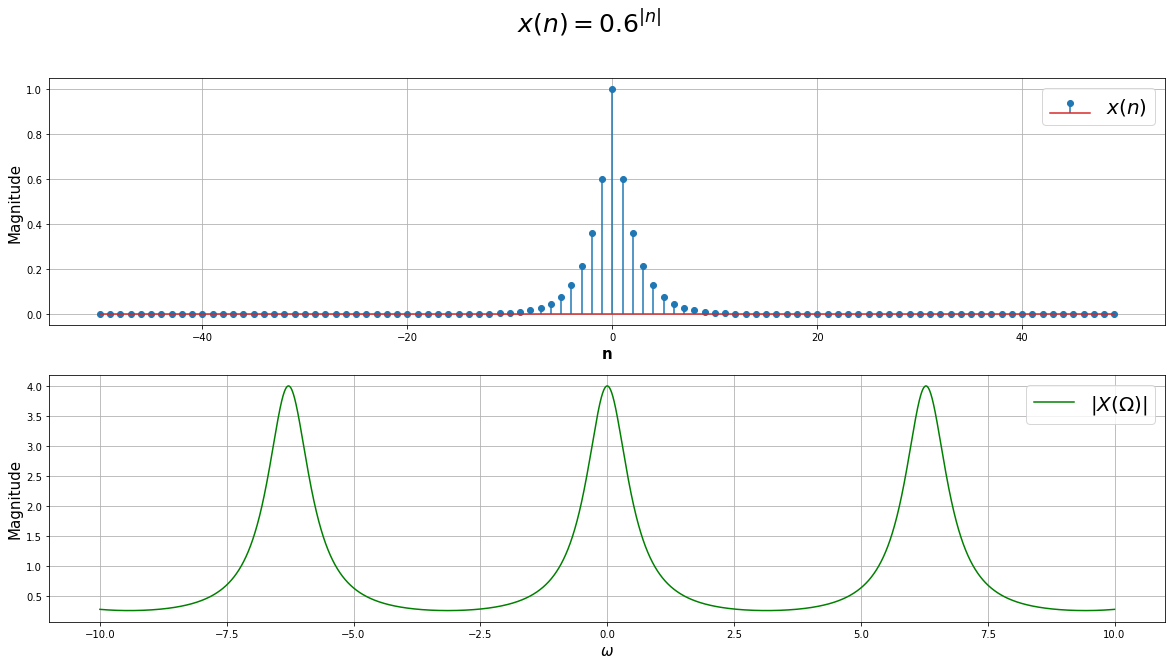

In [15]:
a = 0.6

q5_x = np.arange(-50,50) # n axis
q5_fx = a**np.absolute(q5_x) # generating given signal


xw5, q5_real, q5_imag, q5_mod = dtft(q5_fx,q5_x ) # getting dtft

# plotting
figq5 = plt.figure(figsize = (20,10))
figq5.suptitle(r'$x(n) = 0.6^{|n|}$', size = 25)

axq51 = figq5.add_subplot(211)
axq51.stem(q5_x, q5_fx, label = r'$x(n)$') # given signal
axq51.set_xlabel('n',size = 15, weight = 'bold')
axq51.legend(prop = {'size':20})
plt.ylabel('Magnitude', size = 15)
plt.grid()


axq53 = figq5.add_subplot(212)
axq53.plot(xw5, q5_mod,'g', label = '$|X(\Omega)|$') # modulus
axq53.set_xlabel(r'$\omega$',size = 15, weight = 'bold')
axq53.legend(prop = {'size':20})
plt.ylabel('Magnitude', size = 15)
plt.grid()

plt.show()

# Q6.)
### (a) Generate 3 sine waves with frequencies 2 Hz, 5 Hz, and 8 Hz, having amplitudes of 3, 2, and 1, respectively, and all phases as zeros. Add the 3 sine waves together with a sampling rate $f_s$ = 100 Hz. Plot the resultant signal for a time duration of 1 sec.
### (b) Write a function for discrete Fourier transform (DFT) as DFT(x) which takes in an input argument x, which is a 1-dimensional realvalued signal. The function has to calculate the DFT of the signal and return the DFT values. Apply this function to the signal generated in
### (a) and plot the result. Verify that the output of the DFT is symmetric.
### (c) Filter out the DFT results to obtain only the frequency components of (a) and plot the resultant. That is, filter the frequency components which is greater than $f_s/2.$



# a.)

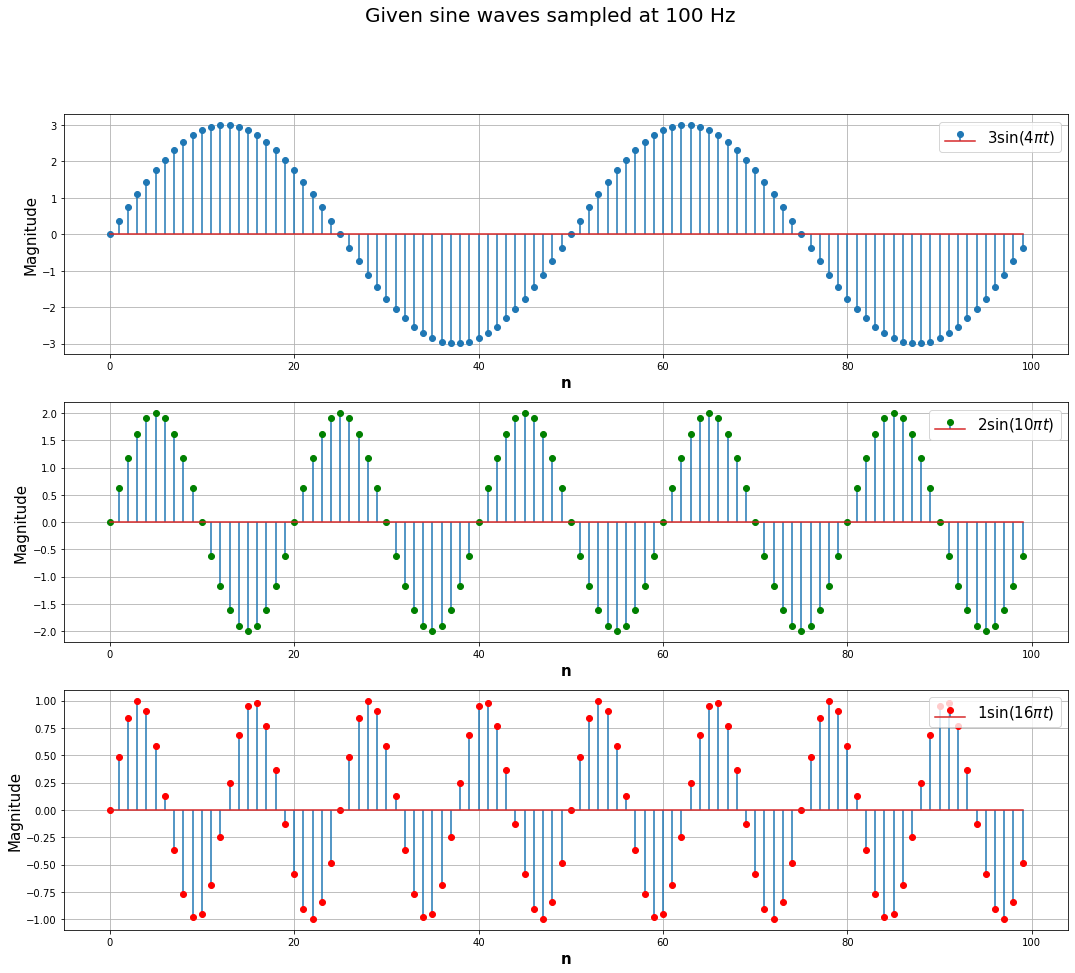

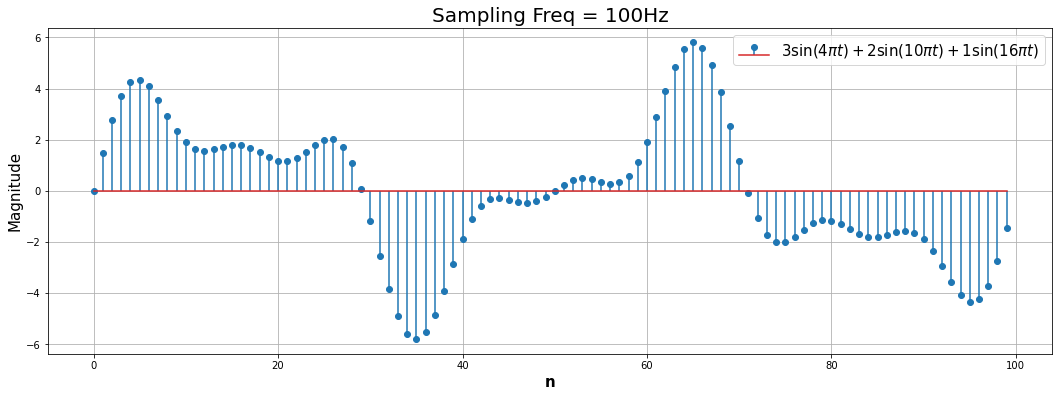

In [16]:
samp_f = 100 # sampling frequency

q6_t = np.arange(0,1, 1/samp_f)  # sampled time axis 
q6_n = np.arange(len(q6_t)) # n axis

# given frequencies
f1 = 2
f2 = 5
f3 = 8

# given amplitudes
a1 = 3
a2 = 2
a3 = 1

# sampled values of signals
sig1 = a1 * np.sin(2 * pi * f1 * q6_t )
sig2 = a2 * np.sin(2 * pi * f2 * q6_t )
sig3 = a3 * np.sin(2 * pi * f3 * q6_t )

sig_sum = sig1 + sig2 + sig3 

fig6a0 = plt.figure(figsize = (18, 15))
fig6a0.suptitle('Given sine waves sampled at 100 Hz', size = 20)

axq6a1 = fig6a0.add_subplot(311)
axq6a1.stem(q6_n, sig1, label = fr'${a1}\sin({2 * f1} \pi t )$')
axq6a1.set_xlabel('n', size = 15, weight = 'bold')
axq6a1.legend(prop = {'size':15})
plt.ylabel('Magnitude', size = 15)
plt.grid()

axq6a2 = fig6a0.add_subplot(312)
axq6a2.stem(q6_n, sig2, markerfmt = 'go', label = fr'${a2}\sin({2 * f2} \pi t )$')
axq6a2.set_xlabel('n', size = 15, weight = 'bold')
axq6a2.legend(prop = {'size':15})
plt.ylabel('Magnitude', size = 15)
plt.grid()

axq6a3 = fig6a0.add_subplot(313)
axq6a3.stem(q6_n, sig3,markerfmt = 'ro', label = fr'${a3}\sin({2 * f3} \pi t )$')
axq6a3.set_xlabel('n', size = 15, weight = 'bold')
axq6a3.legend(prop = {'size':15})
plt.ylabel('Magnitude', size = 15)
plt.grid()

figq6a = plt.figure(figsize = (18, 6))
plt.stem(q6_n, sig3 + sig2 + sig1, label = (fr'${a1}\sin({2 * f1} \pi t ) + {a2}\sin({2 * f2} \pi t ) + {a3}\sin({2 * f3} \pi t )$'))
plt.legend(prop = {'size':15})
plt.title(fr'Sampling Freq = {samp_f}Hz', size = 20)
plt.xlabel('n', size = 15, weight = 'bold')
plt.ylabel('Magnitude', size = 15)
plt.grid()

plt.show()

# b.)

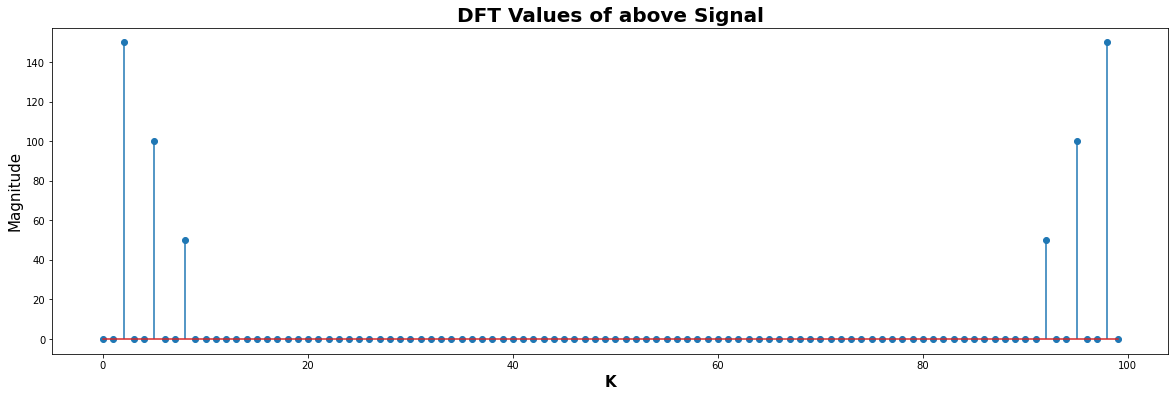

In [17]:
q6_k, q6_rl, q6_im, q6_mod  = dft(sig_sum) # getting dft of the above signal

# plotting
figq6b= plt.figure(figsize = (20, 6))
plt.stem(q6_k, q6_mod)
plt.xlabel('K', size = 15, weight = 'bold')
plt.ylabel('Magnitude', size = 15)
plt.title('DFT Values of above Signal', size = 20, weight = 'bold')
plt.show()




# c.) 

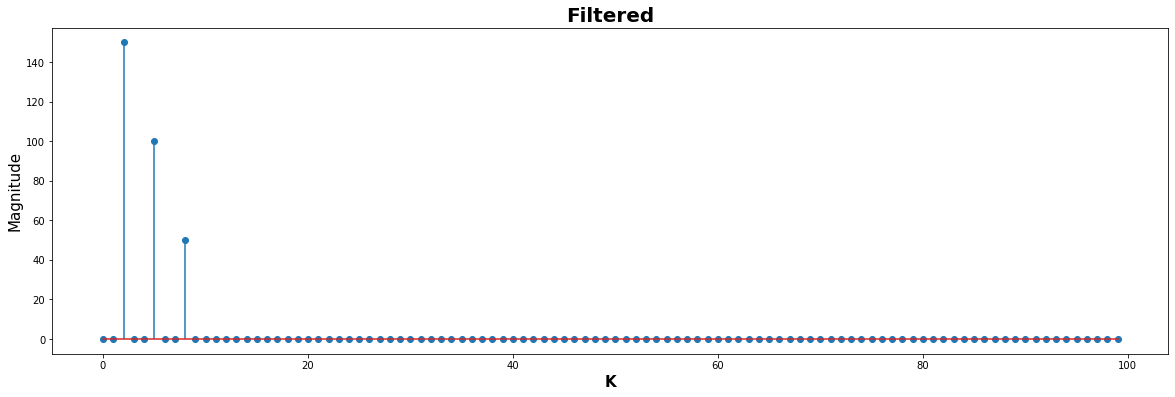

In [18]:
filt = np.zeros_like(q6_mod) # initial array

for i in range(len(q6_k)): # storing the frequencies that are below Fs/2
    if q6_k[i] <= samp_f / 2:
        filt[i] = q6_mod[i]
        
# plotting the filtered DFT
figq6c= plt.figure(figsize = (20, 6))
plt.stem(q6_k, filt)
plt.xlabel('K', size = 15, weight = 'bold')
plt.ylabel('Magnitude', size = 15)
plt.title('Filtered', size = 20, weight = 'bold')
plt.show()

# Q7.) 
### (a) Generate a sinewave of 100 Hz for 1 sec duration. Choose sampling rate, $f_s = 200 Hz$.
### (b) Find its true spectrum.
### (c) Generate rectangular windows of length 80 and 160 samples.
### (d) Plot the two window functions in time and frequency domains. Note down your observations about main lobe, side lobe, and other factors which you may observe.
### (e) Multiply sinewave using rectangular window of duration 80 samples. Compute the DFT spectrum and note down your observation on obtained spectrum by comparing it with true spectrum in (b).
### (f) Multiply sinewave using rectangular window of duration 160 samples. Compute the DFT spectrum and note down your observation on obtained spectrum by comparing it with true spectrum in (b).


# a.) 

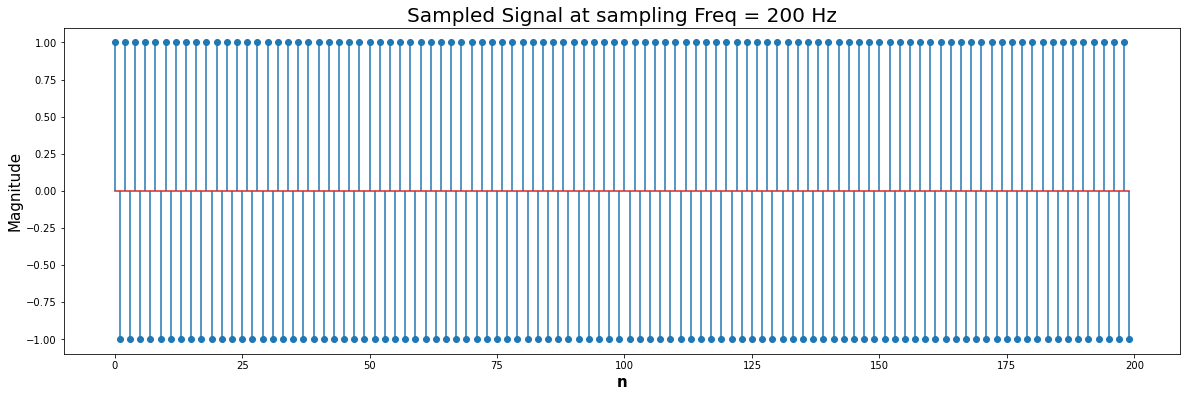

In [19]:
q7_samp_f = 200 # sampling frequency

q7_f  = 100 # signal frequency

q7_t = np.arange(0  , 1, 1/q7_samp_f) # sampled time axis

q7_n = np.arange(len(q7_t)) # n axis

q7_sig = np.cos(2 * pi * q7_f * q7_t ) # generating the sine wave

# plotting
fig7a = plt.figure(figsize = (20,6))
axq7a = fig7a.add_subplot(111) 
axq7a.stem(q7_n, q7_sig)
axq7a.set_title(f'Sampled Signal at sampling Freq = {q7_samp_f} Hz', size = 20)
axq7a.set_xlabel('n', size = 15, weight = 'bold')
plt.ylabel('Magnitude', size = 15)
plt.show()


# b.) 

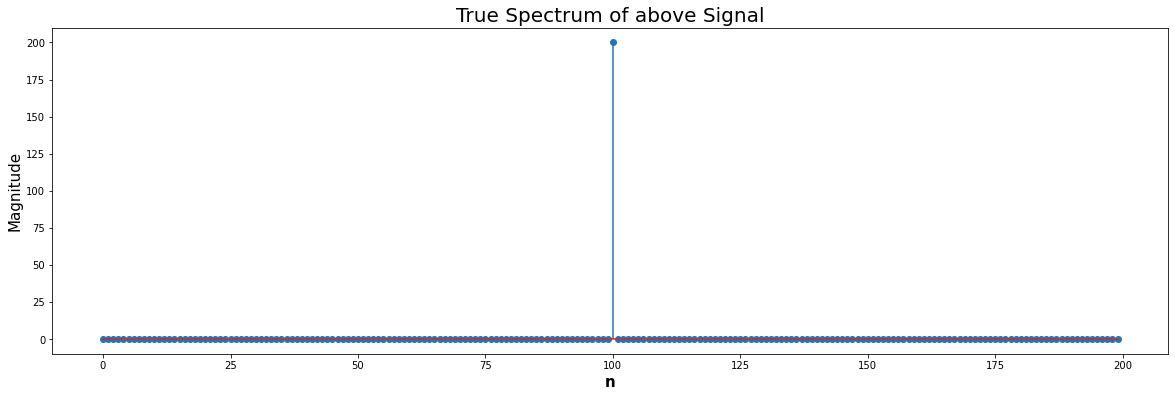

In [20]:

q7b_k, qyb_r,q7b_i,q7b_mod = dft(q7_sig) # getting DFT

# plotting the DFT
figq7b = plt.figure(figsize = (20,6))
axq7b = figq7b.add_subplot(111)
axq7b.stem(q7b_k,q7b_mod)
axq7b.set_title('True Spectrum of above Signal', size = 20)
axq7b.set_xlabel('n', size = 15, weight = 'bold')
plt.ylabel('Magnitude', size = 15)
plt.show()

# c.) 

In [21]:


q7c_n = np.arange(-100,100) # n axis


# generating the windows for 80 and 160 samples
win1 = np.pad(np.ones(80),(60,60),'constant', constant_values = (0,0))
win2 = np.pad(np.ones(160),(20,20),'constant', constant_values = (0,0))

# getting the DTFTs for the windows
xwin1, win1r, win1i, win1mod = dtft(win1, q7c_n)
xwin2, win2r, win2i, win2mod = dtft(win2, q7c_n)





# d.) 

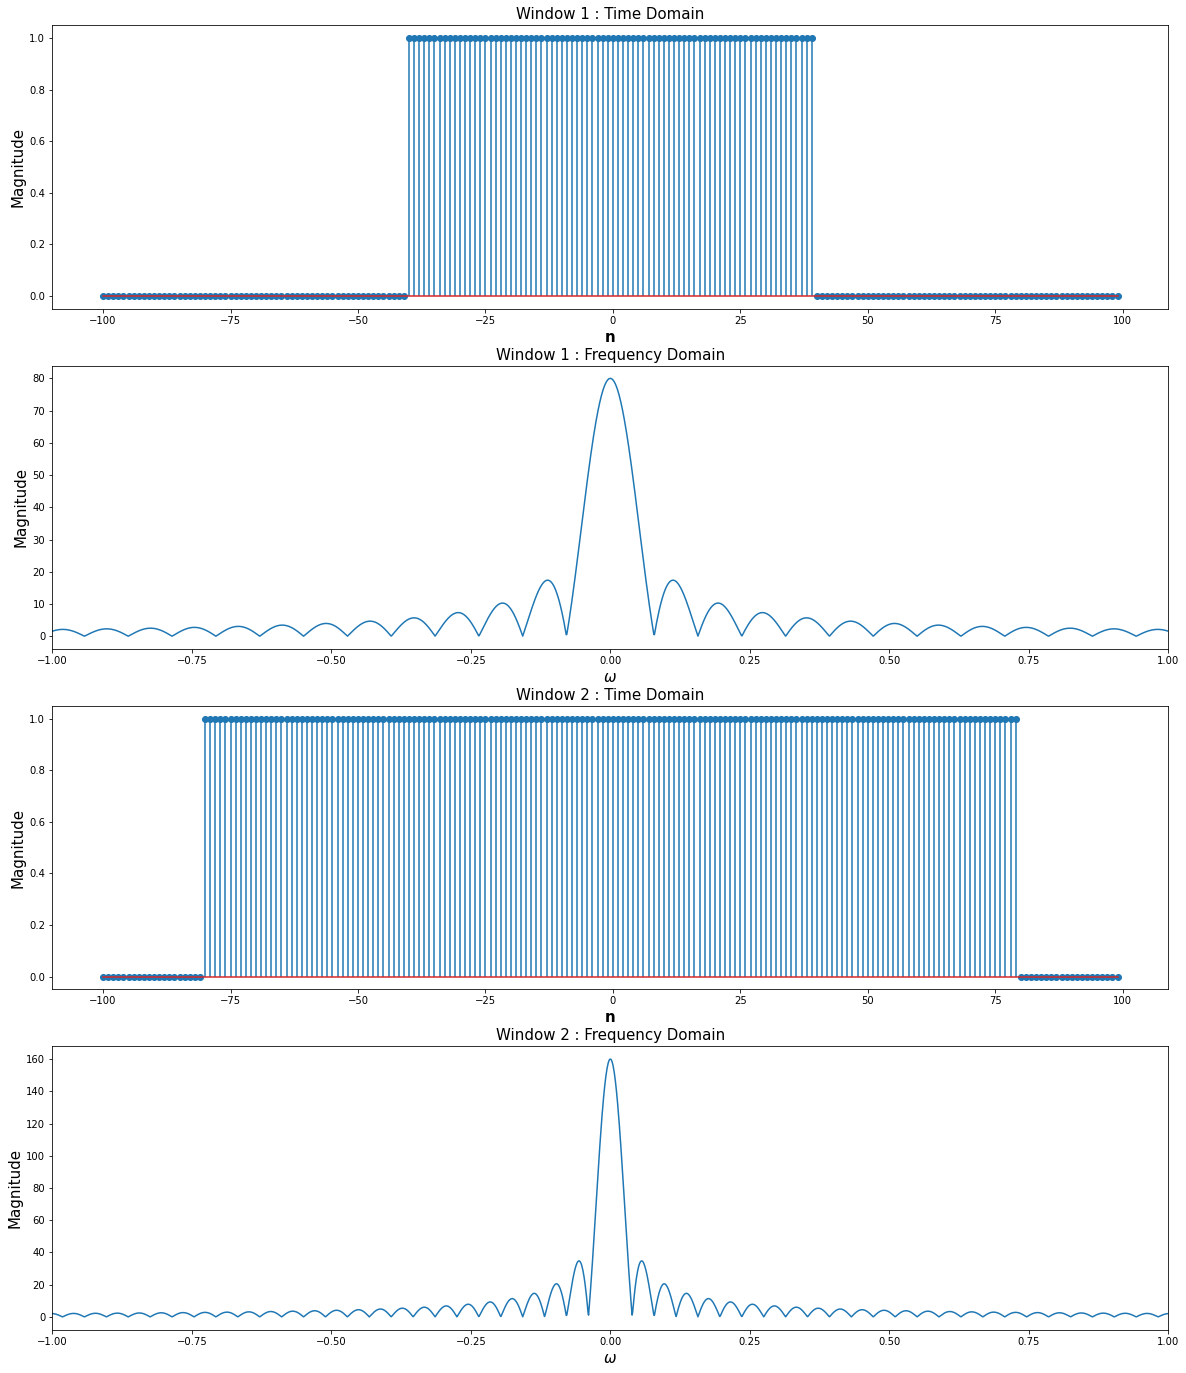

In [22]:
# plotting

figq7c = plt.figure(figsize  =(20,24))

axq7c1 = figq7c.add_subplot(411)
axq7c1.stem(q7c_n,win1) # window 1
axq7c1.set_title('Window 1 : Time Domain', size = 15)
axq7c1.set_xlabel('n', size = 15, weight = 'bold')
plt.ylabel('Magnitude', size = 15)

axq7c2 = figq7c.add_subplot(412)
axq7c2.plot(xwin1,win1mod) # window 1 DTFT
axq7c2.set_title('Window 1 : Frequency Domain', size = 15)
axq7c2.set_xlim(-1,1)
axq7c2.set_xlabel(r'$\omega$', size = 15, weight = 'bold')
plt.ylabel('Magnitude', size = 15)

axq7c3 = figq7c.add_subplot(413)
axq7c3.stem(q7c_n,win2) # window 2
axq7c3.set_title('Window 2 : Time Domain', size = 15)
axq7c3.set_xlabel('n', size = 15, weight = 'bold')
plt.ylabel('Magnitude', size = 15)

axq7c4 = figq7c.add_subplot(414)
axq7c4.plot(xwin2,win2mod) # window 2 DTFT
axq7c4.set_title('Window 2 : Frequency Domain', size = 15)
axq7c4.set_xlim(-1,1)
axq7c4.set_xlabel(r'$\omega$', size = 15, weight = 'bold')
plt.ylabel('Magnitude', size = 15)

plt.show()

####  $ \color{blue}{\text {As the number of samples in rectangular wave increased, the height of main lobe is increased. Also the side lobes are more concentrated.}}$

# e.) 

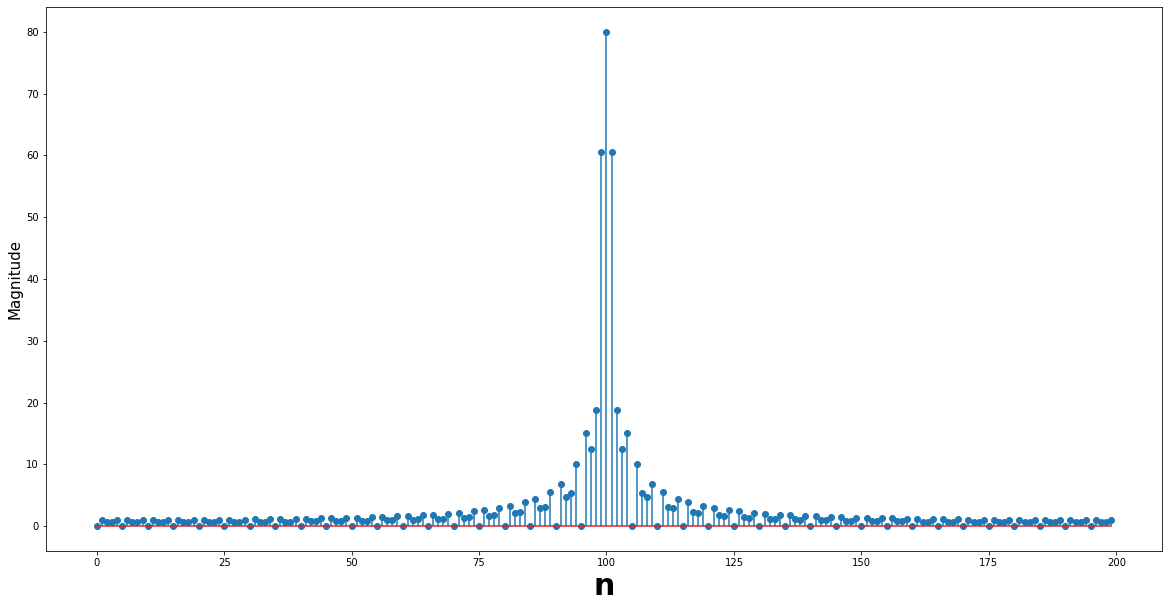

In [23]:
mult1 = q7_sig * win1 # multiplying signal with window 1

q7ex1, q7er1, q7ei1, q7emod1 = dft(mult1) # getting DFT

# plotting DFT
plt.figure(figsize = (20,10))
plt.stem(q7ex1, q7emod1)
plt.xlabel('n', size = 30, weight = 'bold')
plt.ylabel('Magnitude', size = 15)
plt.show()


# f.) 

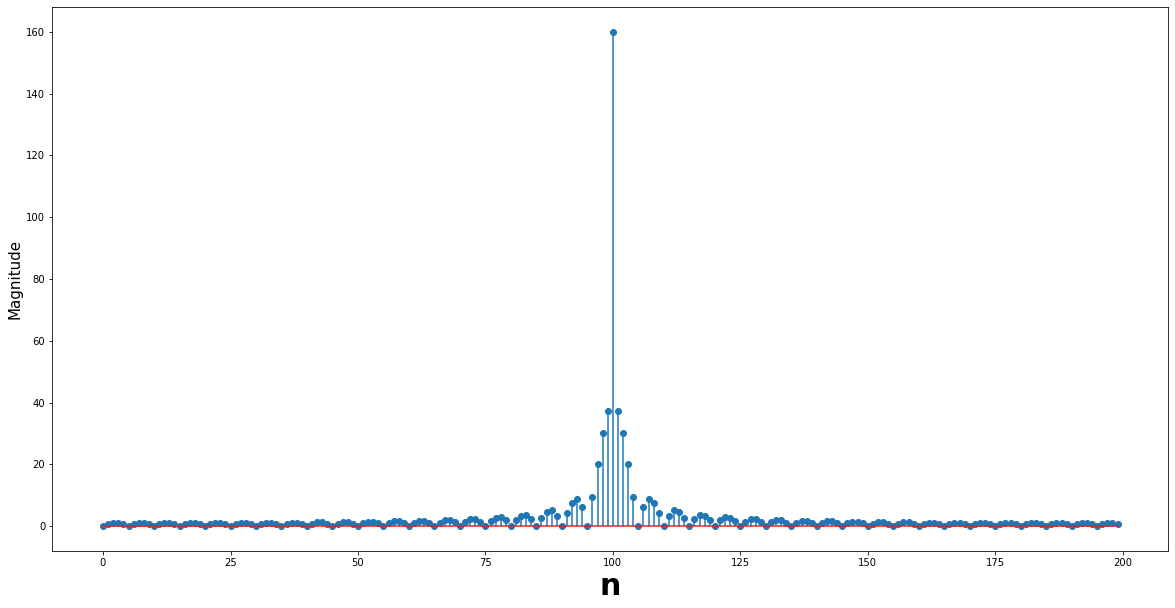

In [24]:
mult2 = q7_sig * win2 # multiplying signal with window 2

q7ex2, q7er2, q7ei2, q7emod2 = dft(mult2) # getting DFT

# plotting DFT
plt.figure(figsize = (20,10))
plt.stem(q7ex2, q7emod2)
plt.xlabel('n', size = 30, weight = 'bold')
plt.ylabel('Magnitude', size = 15)
plt.show()

####  $ \color{blue}{\text {We observe that there is an impulse at 100 Hz which is frequency component present in original sine wave }}$ 